In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
pay_cg1 = pd.read_csv('/Users/eliz/Desktop/Data/payments_CG1.csv', sep=';')
pay_cg2 = pd.read_csv('/Users/eliz/Desktop/Data/payments_CG2.csv', sep=';')

por_cg1 = pd.read_csv('/Users/eliz/Desktop/Data/portrait_CG1.csv', sep=';')
por_cg2 = pd.read_csv('/Users/eliz/Desktop/Data/portrait_CG2.csv', sep=';')

por_tg = pd.read_csv('/Users/eliz/Desktop/Data/portrait_TG.csv', sep=';')
pay_tg = pd.read_csv('/Users/eliz/Desktop/Data/payments_TG.csv', sep=';')

In [4]:
# 1. Проверка A/B теста на значимость (достоверность) результатов

In [5]:
# Проверим распределение метрики доход на нормальность. Для этого сначала построим QQ-плот, 
# после проведем Shapiro-Wilk test для каждой из групп

In [6]:
cg1_prem = pay_cg1[pay_cg1['product_type'] == 'prem']
cg2_prem = pay_cg2[pay_cg2['product_type'] == 'prem']
tg_prem = pay_tg[pay_tg['product_type'] == 'prem']

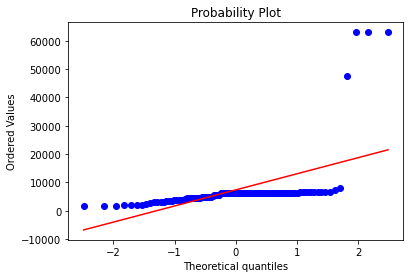

In [7]:
scipy.stats.probplot(cg1_prem['revenue'], dist="norm", plot=plt)
plt.show()

# Распределение в Контрольной группе 1 явно отклоняется от нормального

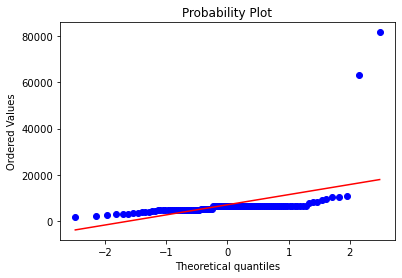

In [8]:
scipy.stats.probplot(cg2_prem['revenue'], dist="norm", plot=plt)
plt.show()

# Распределение в Контрольной группе 2 явно отклоняется от нормального

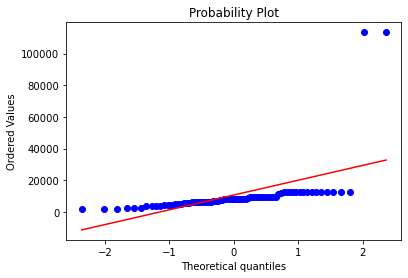

In [9]:
scipy.stats.probplot(tg_prem['revenue'], dist="norm", plot=plt)
plt.show()

# Распределение в Тестовой группе явно отклоняется от нормального

In [10]:
# На основе построенных QQ-плотов, можно сказать, что распределение в каждой из групп
# является ненормальным. Однако, для точного результата проведем Shapiro-Wilk Normality test.

In [11]:
rev_col_cg1 = cg1_prem['revenue'].to_frame()
rev_col_cg2 = cg2_prem['revenue'].to_frame()
rev_col_tg = tg_prem['revenue'].to_frame()

In [12]:
scipy.stats.shapiro(rev_col_cg1)

ShapiroResult(statistic=0.29585927724838257, pvalue=2.847592200051099e-20)

In [13]:
scipy.stats.shapiro(rev_col_cg2)

ShapiroResult(statistic=0.23264849185943604, pvalue=3.8541353769882434e-21)

In [14]:
scipy.stats.shapiro(rev_col_tg)

ShapiroResult(statistic=0.2963985800743103, pvalue=2.6612618804233768e-17)

In [15]:
# В соответствие с результатами теста, можно отклонить нулевую гипотезу H0.

In [16]:
# Так как распределение в каждой из групп является ненормальным, мы должны использовать тест для 
# непараметричных данных — Mann-Whitney's test. H0 - данные по группам
# не имеют значимой разницы, Н1 - данные по группам имеют значимую разницу.

In [17]:
scipy.stats.mannwhitneyu(rev_col_cg1 ,rev_col_cg2)

MannwhitneyuResult(statistic=5365.5, pvalue=0.24210708365252903)

In [18]:
# По результатам теста по Контрольным группам p > 0.05, что означает, что мы не можем отклонить гипотезу H0.
# Таким образом, между Контрольной группой 1 и Контрольной группой 2 значительных различий по метрике дохада
# ('revenue') нет.

In [19]:
rev_col_cg1_cg2 = pd.concat([rev_col_cg1['revenue'], rev_col_cg2['revenue']], ignore_index=True).to_frame()
rev_col_cg1_cg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  213 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


In [20]:
scipy.stats.mannwhitneyu(rev_col_cg1_cg2 ,rev_col_tg)

MannwhitneyuResult(statistic=4551.0, pvalue=4.529171012410012e-09)

In [21]:
# По результатам таста, получаем p < 0.05, что позволяет нам отвергнуть нулевую гипотезу об отсутствии значимой
# разницы между Контрольными группами и Тестовой.
# Таким образом, различия между группами по метрике доход ('revenue') являются значимыми.

In [22]:
# 2. Анализ данных

In [23]:
pay_cg1.head()

,user_id,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
0,891319275.0,05.11.2017 19:57,12.11.2017 21:57,12727.0,147.0,TrialVipPopup,FR,trial
1,892421826.0,14.10.2017 12:46,23.10.2017 12:54,14586.0,147.0,TrialVipPopup,IL,trial
2,891822480.0,26.10.2017 22:27,12.11.2017 20:59,1911.0,19.0,none,IT,coins
3,891367521.0,05.11.2017 2:37,06.11.2017 19:15,1456.0,127.0,sympathy_access,IT,other
4,892207959.0,18.10.2017 18:30,12.11.2017 12:03,1261.0,19.0,EmptyLikes,FR,coins


In [24]:
pay_cg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             377 non-null    float64
 1   registration_date   377 non-null    object 
 2   payment_date        377 non-null    object 
 3   revenue             377 non-null    float64
 4   payment_service_id  377 non-null    float64
 5   place               377 non-null    object 
 6   country             377 non-null    object 
 7   product_type        377 non-null    object 
dtypes: float64(3), object(5)
memory usage: 63.1+ KB


In [25]:
print(por_cg1.shape)

(4340, 13)


In [26]:
print(pay_cg1.columns)

Index(['user_id', 'registration_date', 'payment_date', 'revenue',
       'payment_service_id', 'place', 'country', 'product_type'],
      dtype='object')


In [27]:
print(pay_cg1.dtypes)

user_id               float64
registration_date      object
payment_date           object
revenue               float64
payment_service_id    float64
place                  object
country                object
product_type           object
dtype: object


In [28]:
pd.options.display.float_format = '{:,.1f}'.format 
pay_cg1.describe()

,user_id,revenue,payment_service_id
count,377.0,377.0,377.0
mean,"892,361,213.6","6,929.2",91.1
std,"6,162,900.4","8,027.9",58.6
min,"891,092,322.0",26.0,0.0
25%,"891,383,310.0","2,730.0",19.0
50%,"891,822,480.0","6,266.0",127.0
75%,"892,185,039.0","6,448.0",147.0
max,"960,936,960.0","63,037.0",147.0


In [29]:
por_cg1.head()

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
0,892319115,25,435,nan,US,"1,2,3,4,5,6",0,22,32,982,nan,nan,0
1,891248523,29,500,nan,US,"1,2",1,26,32,12,nan,nan,0
2,891670932,33,800,nan,FR,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,nan,nan,0
3,891060786,26,0,nan,AR,"1,2,3,4,5",1,23,29,0,nan,nan,0
4,892006554,35,294,nan,US,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,nan,nan,0


In [30]:
is_special = len(por_cg1[por_cg1['is_special']== 1])
cg1_num = len(por_cg1.index)

print('\n Всего людей в Контрольной группе №1:', cg1_num, '\n', 'Из них', is_special, 
      'имеют на данный момент имеют премиум-статус' )


 Всего людей в Контрольной группе №1: 4340 
 Из них 192 имеют на данный момент имеют премиум-статус


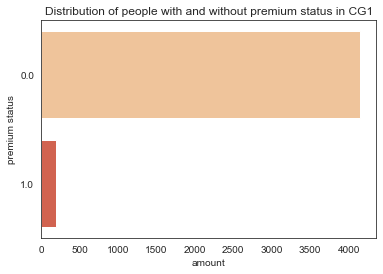

In [31]:
por_cg1['is_special'] = por_cg1['is_special'].fillna(0)

sns.set_style('white')
sns.countplot(y = 'is_special', data = por_cg1, palette = 'OrRd').set(title = 'Distribution of people with and without premium status in CG1')
plt.xlabel('amount')
plt.ylabel('premium status')
plt.show()

In [32]:
por_cg1.head()

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
0,892319115,25,435,nan,US,"1,2,3,4,5,6",0,22,32,982,nan,0.0,0
1,891248523,29,500,nan,US,"1,2",1,26,32,12,nan,0.0,0
2,891670932,33,800,nan,FR,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,nan,0.0,0
3,891060786,26,0,nan,AR,"1,2,3,4,5",1,23,29,0,nan,0.0,0
4,892006554,35,294,nan,US,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,nan,0.0,0


In [33]:
is_special2 = len(por_cg2[por_cg2['is_special']== 1])
cg2_num = len(por_cg2.index)

print('\n Всего людей в Контрольной группе №2:', cg2_num, '\n', 'Из них', is_special2, 
      'на данный момент имеют премиум-статус' )


 Всего людей в Контрольной группе №2: 4264 
 Из них 191 на данный момент имеют премиум-статус


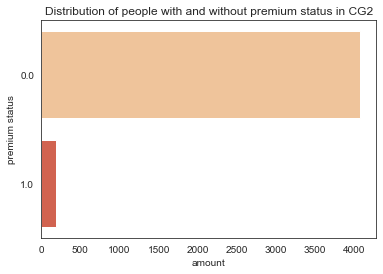

In [34]:
por_cg2['is_special'] = por_cg2['is_special'].fillna(0)

sns.set_style('white')
sns.countplot(y = 'is_special', data = por_cg2, palette = 'OrRd').set(title = 'Distribution of people with and without premium status in CG2')
plt.xlabel('amount')
plt.ylabel('premium status')
plt.show()

In [35]:
por_tg.head()

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
0,892309896,27,685,nan,US,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,nan,nan,0
1,892044516,27,0,nan,DE,NaN,1,24,30,0,nan,nan,0
2,892185708,45,44,nan,IL,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,nan,nan,0
3,892130292,32,0,nan,US,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,nan,nan,0
4,891406035,27,1000,nan,FR,NaN,1,24,30,1,1.0,nan,0


In [36]:
is_special_tg = len(por_tg[por_tg['is_special']== 1])
tg_num = len(por_tg.index)

print('\n Всего людей в Тестовой группе', tg_num, '\n', 'Из них', is_special_tg, 
      'на данный момент имеют премиум-статус')


 Всего людей в Тестовой группе 4308 
 Из них 157 на данный момент имеют премиум-статус


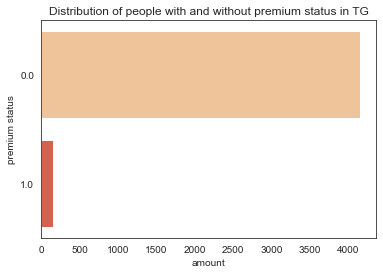

In [37]:
por_tg['is_special'] = por_tg['is_special'].fillna(0)

sns.set_style('white')
sns.countplot(y = 'is_special', data = por_tg, palette = 'OrRd').set(title = 'Distribution of people with and without premium status in TG')
plt.xlabel('amount')
plt.ylabel('premium status')
plt.show()

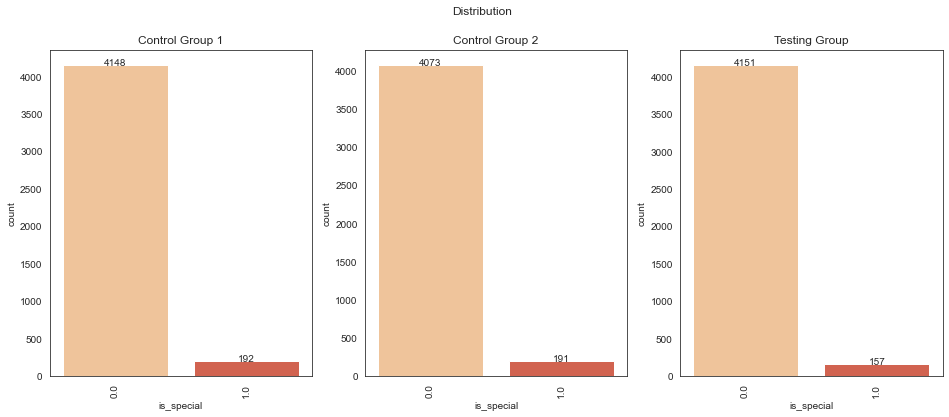

In [38]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(16,6))

figure.suptitle('Distribution')

sns.set_style('white')

first = sns.countplot(ax = axes[0], data = por_cg1, x = 'is_special', palette = 'OrRd')
sec = sns.countplot(ax = axes[1], data = por_cg2, x = 'is_special', palette = 'OrRd')
third = sns.countplot(ax = axes[2], data = por_tg, x = 'is_special', palette = 'OrRd')

first.set_title('Control Group 1')
sec.set_title('Control Group 2')
third.set_title('Testing Group')



first.set_xticklabels(first.get_xticklabels(),rotation = 90)
for p in first.patches:
    height = p.get_height()
    first.text(p.get_x() + p.get_width() / 2., height + 0.1,height ,ha = 'center')

sec.set_xticklabels(sec.get_xticklabels(),rotation = 90)
for p in sec.patches:
    height = p.get_height()
    sec.text(p.get_x() + p.get_width() / 2., height + 0.1, height ,ha = 'center')

third.set_xticklabels(third.get_xticklabels(),rotation = 90)
for p in third.patches:
    height = p.get_height()
    third.text(p.get_x() + p.get_width() / 2., height + 0.1, height ,ha = 'center')
    
# На графике видно, что количество пользовотелей с премиум подпиской больше в контрольных группах, 
# чем в тестовой. Однако, данной информации недосточно для того, чтобы сказать однозначно связано 
# ли это с введением новой политики цен в приложении или нет.

In [39]:
# Для того, чтобы приблизиться к точному ответу на вопрос об успешности эксперимента необходимо 
# так же проследить является ли премимум-подписка пробной
# или была куплена пользователем – то есть выяснить повлияли ли измненения в политики стоимости
# премиум подписки положительно на доход ('revenue') или отрицательно.

In [40]:
pay_cg1.head()

,user_id,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
0,"891,319,275.0",05.11.2017 19:57,12.11.2017 21:57,"12,727.0",147.0,TrialVipPopup,FR,trial
1,"892,421,826.0",14.10.2017 12:46,23.10.2017 12:54,"14,586.0",147.0,TrialVipPopup,IL,trial
2,"891,822,480.0",26.10.2017 22:27,12.11.2017 20:59,"1,911.0",19.0,none,IT,coins
3,"891,367,521.0",05.11.2017 2:37,06.11.2017 19:15,"1,456.0",127.0,sympathy_access,IT,other
4,"892,207,959.0",18.10.2017 18:30,12.11.2017 12:03,"1,261.0",19.0,EmptyLikes,FR,coins


In [41]:
pay_cg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             377 non-null    float64
 1   registration_date   377 non-null    object 
 2   payment_date        377 non-null    object 
 3   revenue             377 non-null    float64
 4   payment_service_id  377 non-null    float64
 5   place               377 non-null    object 
 6   country             377 non-null    object 
 7   product_type        377 non-null    object 
dtypes: float64(3), object(5)
memory usage: 63.1+ KB


In [42]:
pay_cg1.shape

(1007, 8)

In [43]:
pay_cg1.dtypes

user_id               float64
registration_date      object
payment_date           object
revenue               float64
payment_service_id    float64
place                  object
country                object
product_type           object
dtype: object

In [44]:
pay_cg1.describe()

,user_id,revenue,payment_service_id
count,377.0,377.0,377.0
mean,"892,361,213.6","6,929.2",91.1
std,"6,162,900.4","8,027.9",58.6
min,"891,092,322.0",26.0,0.0
25%,"891,383,310.0","2,730.0",19.0
50%,"891,822,480.0","6,266.0",127.0
75%,"892,185,039.0","6,448.0",147.0
max,"960,936,960.0","63,037.0",147.0


In [45]:
pay_cg1.groupby('product_type').agg({'revenue': 'sum'}) # типы продуктов и доход от каждого из них

,revenue
product_type,
coins,"871,910.0"
other,"188,422.0"
prem,"779,259.0"
trial,"772,720.0"


In [46]:
prem = pay_cg1[pay_cg1['product_type'] == 'prem']
prem.groupby('user_id', as_index = False).agg({'revenue': 'sum'})

,user_id,revenue
0,"891,092,322.0","5,278.0"
1,"891,120,969.0","6,292.0"
2,"891,130,164.0","4,537.0"
3,"891,131,061.0","6,292.0"
4,"891,142,386.0","4,680.0"
...,...,...
94,"892,366,260.0","12,584.0"
95,"892,380,033.0","4,732.0"
96,"892,393,119.0","3,614.0"
97,"892,405,224.0","6,292.0"


In [47]:
# Объединение таблиц с данными для Контрольной группы 1

In [48]:
cg1 = pd.merge(por_cg1, pay_cg1, how = 'right', on = 'user_id')
cg1

,user_id,age,attraction_distribution,coins,country_x,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,registration_date,payment_date,revenue,payment_service_id,place,country_y,product_type
0,"891,319,275.0",27.0,0.0,nan,FR,"1,2,3",1.0,24.0,30.0,2.0,1.0,1.0,"13,455.0",05.11.2017 19:57,12.11.2017 21:57,"12,727.0",147.0,TrialVipPopup,FR,trial
1,"891,319,275.0",27.0,0.0,nan,FR,"1,2,3",1.0,24.0,30.0,2.0,1.0,1.0,"13,455.0",05.11.2017 19:57,05.11.2017 20:05,728.0,146.0,AdToPhotoBlog,FR,coins
2,"892,421,826.0",31.0,43.0,nan,IL,"1,2,4,6,7,10,11,12,13,14,15,17,18,19,20,21,22,...",1.0,28.0,34.0,69.0,1.0,1.0,"14,586.0",14.10.2017 12:46,23.10.2017 12:54,"14,586.0",147.0,TrialVipPopup,IL,trial
3,"891,822,480.0",28.0,337.0,10.0,IT,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19",1.0,25.0,31.0,77.0,1.0,1.0,"17,810.0",26.10.2017 22:27,12.11.2017 20:59,"1,911.0",19.0,none,IT,coins
4,"891,822,480.0",28.0,337.0,10.0,IT,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19",1.0,25.0,31.0,77.0,1.0,1.0,"17,810.0",26.10.2017 22:27,01.11.2017 16:50,"1,898.0",19.0,none,IT,coins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,NaN,NaN,NaN
1003,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,NaN,NaN,NaN
1004,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,NaN,NaN,NaN
1005,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,NaN,NaN,NaN


In [49]:
cg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 0 to 1006
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  377 non-null    float64
 1   age                      377 non-null    float64
 2   attraction_distribution  377 non-null    float64
 3   coins                    215 non-null    float64
 4   country_x                377 non-null    object 
 5   retention_days           360 non-null    object 
 6   sex                      377 non-null    float64
 7   user_dating.age_start    377 non-null    float64
 8   user_dating.age_end      377 non-null    float64
 9   view_count               377 non-null    float64
 10  was_special              349 non-null    float64
 11  is_special               377 non-null    float64
 12  total_revenue            377 non-null    float64
 13  registration_date        377 non-null    object 
 14  payment_date            

In [50]:
cg1.describe()

,user_id,age,attraction_distribution,coins,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,revenue,payment_service_id
count,377.0,377.0,377.0,215.0,377.0,377.0,377.0,377.0,349.0,377.0,377.0,377.0,377.0
mean,"892,361,213.6",30.3,304.9,"1,864.2",1.0,23.6,38.2,232.5,1.0,0.8,"49,623.5","6,929.2",91.1
std,"6,162,900.4",9.7,200.7,"11,756.7",0.1,7.6,16.0,460.1,0.0,0.4,"122,245.9","8,027.9",58.6
min,"891,092,322.0",16.0,0.0,1.0,0.0,16.0,20.0,0.0,1.0,0.0,0.0,26.0,0.0
25%,"891,383,310.0",24.0,175.0,8.0,1.0,18.0,28.0,24.0,1.0,1.0,"8,424.0","2,730.0",19.0
50%,"891,822,480.0",27.0,258.0,11.0,1.0,22.0,34.0,89.0,1.0,1.0,"12,727.0","6,266.0",127.0
75%,"892,185,039.0",35.0,411.0,40.0,1.0,27.0,44.0,237.0,1.0,1.0,"20,462.0","6,448.0",147.0
max,"960,936,960.0",99.0,"1,000.0","99,958.0",1.0,55.0,99.0,"4,262.0",1.0,1.0,"486,330.0","63,037.0",147.0


In [51]:
# Распределение общего доходов по типу продукта для Контрольной группы 1

totrev_cg1 = cg1.groupby('product_type', as_index = False).total_revenue.sum()
totrev_cg1

,product_type,total_revenue
0,coins,"10,126,402.0"
1,other,"6,067,399.0"
2,prem,"1,700,257.0"
3,trial,"813,995.0"


Text(0.5, 1.0, 'Total revenue for the product type in Control Group 1')

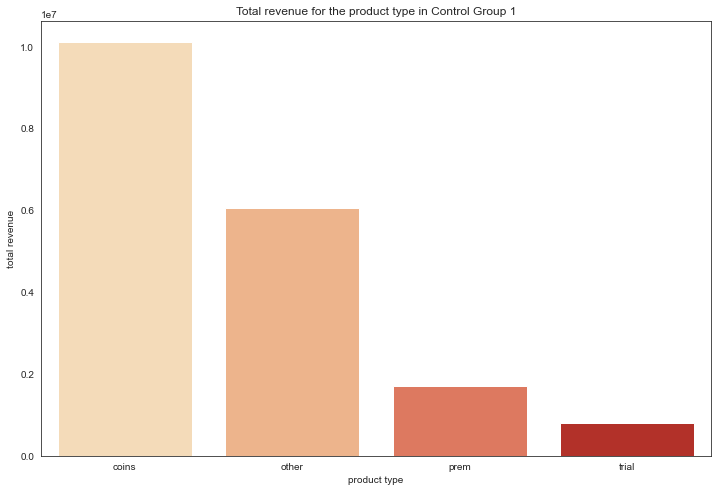

In [52]:
sns.set_style('white')

plt.figure(figsize=(12,8))
sns.barplot(x = 'product_type', y = 'total_revenue', data = totrev_cg1, palette = 'OrRd')

plt.xlabel('product type')
plt.ylabel('total revenue')
plt.title('Total revenue for the product type in Control Group 1')

In [53]:
cg1_prem = cg1[cg1['product_type'] == 'prem'] # пользователи только с премиум подпиской
cg1_prem.head()

,user_id,age,attraction_distribution,coins,country_x,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,registration_date,payment_date,revenue,payment_service_id,place,country_y,product_type
6,"891,822,480.0",28.0,337.0,10.0,IT,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19",1.0,25.0,31.0,77.0,1.0,1.0,"17,810.0",26.10.2017 22:27,27.10.2017 23:29,"1,898.0",68.0,none,IT,prem
7,"891,822,480.0",28.0,337.0,10.0,IT,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19",1.0,25.0,31.0,77.0,1.0,1.0,"17,810.0",26.10.2017 22:27,07.11.2017 0:04,"6,292.0",147.0,promo.key31,IT,prem
23,"892,207,959.0",21.0,230.0,nan,FR,"1,2,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20...",1.0,18.0,24.0,430.0,1.0,1.0,"18,902.0",18.10.2017 18:30,27.10.2017 10:37,"6,292.0",147.0,promo.key31,FR,prem
46,"892,333,905.0",22.0,175.0,"3,608.0",IT,"1,2,3,4,5,6,7,15",1.0,19.0,25.0,575.0,1.0,1.0,"486,330.0",16.10.2017 1:38,16.10.2017 13:10,"63,037.0",147.0,no_symphaties_no_vip_stub,IT,prem
69,"891,739,737.0",25.0,303.0,22.0,US,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18",1.0,22.0,28.0,89.0,1.0,1.0,"21,424.0",28.10.2017 18:50,11.11.2017 6:05,"6,292.0",147.0,promo.key31,US,prem


In [54]:
cg1_prem.shape

(106, 20)

In [55]:
cg1_prem['payment_date'] = pd.to_datetime(cg1_prem['payment_date'])

<ipython-input-55-00dc16551d30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cg1_prem['payment_date'] = pd.to_datetime(cg1_prem['payment_date'])


In [56]:
cg1_prem_p = cg1_prem.groupby(['payment_date'], as_index=False).agg({'revenue': 'sum'})

In [57]:
# Распределение дохода в течение периода от премиум подписок в Контрольной группе 1

Text(0.5, 1.0, 'Revenue for premium subscribtion in Control Group 1')

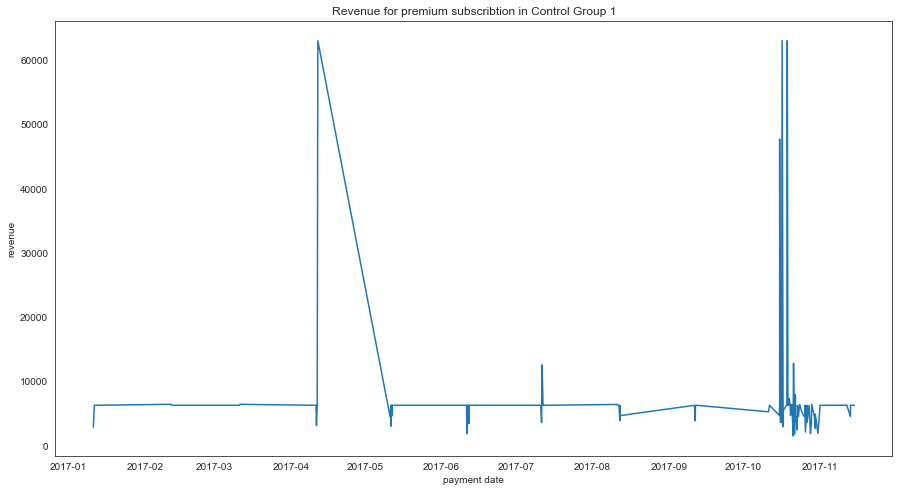

In [58]:
sns.set_style('white')

plt.figure(figsize=(15,8))
sns.lineplot(data = cg1_prem_p, x = 'payment_date', y = 'revenue', palette = 'OrRd')

plt.xlabel('payment date')
plt.ylabel('revenue')
plt.title('Revenue for premium subscribtion in Control Group 1')


In [59]:
# Объединение данных для Контрольной группы 2 

In [60]:
pay_cg2.head() 

,user_id,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
0,891266616,06.11.2017 15:25,10.11.2017 17:35,6305,19,autorefill,AR,coins
1,892186737,19.10.2017 6:03,04.11.2017 8:53,4732,147,promo.key31,CL,prem
2,891959004,24.10.2017 0:12,31.10.2017 2:12,10153,147,TrialVipPopup,US,trial
3,892115478,20.10.2017 20:39,26.10.2017 6:26,2366,67,EmptyLikes,ES,other
4,891592941,31.10.2017 12:40,03.11.2017 16:25,6292,147,promo.key31,CH,prem


In [61]:
pay_cg2.groupby('product_type').agg({'revenue': 'sum'}) # типы продуктов и доход от каждого из них

,revenue
product_type,
coins,402909
other,128739
prem,744809
trial,643981


In [62]:
cg2 = pd.merge(por_cg2, pay_cg2, how = 'right', on = 'user_id')
cg2

,user_id,age,attraction_distribution,coins,country_x,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,registration_date,payment_date,revenue,payment_service_id,place,country_y,product_type
0,891266616,28,229,6.0,AR,"1,2,3,4,5,6,7,8,9",1,18,45,48,1.0,1.0,18902,06.11.2017 15:25,10.11.2017 17:35,6305,19,autorefill,AR,coins
1,891266616,28,229,6.0,AR,"1,2,3,4,5,6,7,8,9",1,18,45,48,1.0,1.0,18902,06.11.2017 15:25,08.11.2017 5:22,6305,19,EmptyLikes,AR,coins
2,891266616,28,229,6.0,AR,"1,2,3,4,5,6,7,8,9",1,18,45,48,1.0,1.0,18902,06.11.2017 15:25,07.11.2017 0:08,6292,147,promo.key31,AR,prem
3,892186737,30,250,nan,CL,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",1,27,33,8,1.0,1.0,4732,19.10.2017 6:03,04.11.2017 8:53,4732,147,promo.key31,CL,prem
4,891959004,45,0,nan,US,"1,2,3,4,6,7,8,9,10,11,12,13,15,16,17,18,19,20,...",1,42,48,0,1.0,1.0,10153,24.10.2017 0:12,31.10.2017 2:12,10153,147,TrialVipPopup,US,trial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,891985866,34,349,4.0,BE,"1,2,3,4,5,6,7,8,10,11,12,14,16,17,19,21,22",1,21,99,63,1.0,1.0,20605,23.10.2017 13:19,30.10.2017 15:35,16640,147,TrialVipPopup,BE,trial
324,891673269,28,703,nan,AE,1,1,25,31,27,1.0,1.0,13247,29.10.2017 21:40,05.11.2017 23:49,13247,147,Dating,AE,trial
325,892032072,26,0,nan,GB,"1,2,3",0,16,99,16157,1.0,0.0,3588,22.10.2017 14:21,23.10.2017 15:37,3588,68,none,GB,prem
326,891491145,20,875,nan,US,"1,2,3",1,18,31,24,1.0,1.0,12727,02.11.2017 18:13,09.11.2017 20:32,12727,147,SendMessage,US,trial


In [63]:
cg2.describe()

,user_id,age,attraction_distribution,coins,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,revenue,payment_service_id
count,328.0,328.0,328.0,164.0,328.0,328.0,328.0,328.0,312.0,328.0,328.0,328.0,328.0
mean,"891,812,128.1",32.8,333.5,18.9,1.0,25.1,39.4,275.4,1.0,0.8,"13,006.9","5,855.0",95.5
std,"380,214.9",11.6,229.2,37.0,0.1,8.2,15.5,"1,003.8",0.0,0.4,"10,100.6","6,582.2",57.2
min,"891,068,079.0",16.0,0.0,1.0,0.0,15.0,20.0,0.0,1.0,0.0,481.0,481.0,0.0
25%,"891,573,769.5",25.0,165.2,6.0,1.0,18.0,29.0,22.8,1.0,1.0,"6,292.0","2,323.8",19.0
50%,"891,862,596.0",30.0,288.0,10.0,1.0,24.0,35.0,73.5,1.0,1.0,"10,406.5","4,706.0",146.0
75%,"892,128,138.0",39.0,424.0,20.0,1.0,29.0,47.0,204.5,1.0,1.0,"16,575.0","6,314.8",147.0
max,"892,438,776.0",99.0,"1,000.0",271.0,1.0,52.0,99.0,"16,157.0",1.0,1.0,"81,796.0","81,796.0",147.0


In [64]:
# Распределение общего доходов по типу продукта для Контрольной группы 2

totrev_cg2 = cg2.groupby('product_type', as_index = False).total_revenue.sum()
totrev_cg2

,product_type,total_revenue
0,coins,1802034
1,other,609830
2,prem,1128205
3,trial,726193


Text(0.5, 1.0, 'Total revenue for the product type in Control Group 2')

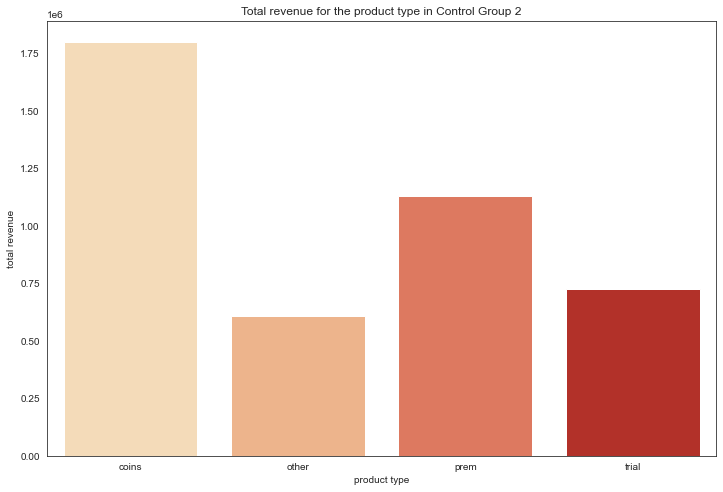

In [65]:
sns.set_style('white')

plt.figure(figsize=(12,8))
sns.barplot(x = 'product_type', y = 'total_revenue', data = totrev_cg2, palette = 'OrRd')

plt.xlabel('product type')
plt.ylabel('total revenue')
plt.title('Total revenue for the product type in Control Group 2')

In [66]:
cg2_prem = cg2[cg2['product_type'] == 'prem'] # пользователи только с премиум подпиской
cg2_prem.head()

,user_id,age,attraction_distribution,coins,country_x,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,registration_date,payment_date,revenue,payment_service_id,place,country_y,product_type
2,891266616,28,229,6.0,AR,"1,2,3,4,5,6,7,8,9",1,18,45,48,1.0,1.0,18902,06.11.2017 15:25,07.11.2017 0:08,6292,147,promo.key31,AR,prem
3,892186737,30,250,nan,CL,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",1,27,33,8,1.0,1.0,4732,19.10.2017 6:03,04.11.2017 8:53,4732,147,promo.key31,CL,prem
6,892115478,40,99,nan,ES,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",1,37,43,994,1.0,1.0,11154,20.10.2017 20:39,20.10.2017 20:43,6474,147,LeftMenu,ES,prem
8,891592941,38,112,4.0,CH,"1,2,3,4,5,6,7,8,9,10,11,12,13",1,35,41,62,1.0,1.0,10192,31.10.2017 12:40,03.11.2017 16:25,6292,147,promo.key31,CH,prem
10,892245918,34,622,nan,FR,"1,2,3,4,5,6,7,8,11,12,13,14,15,16,17,18,19,20,...",1,20,39,61,1.0,1.0,6292,17.10.2017 21:05,17.10.2017 22:35,6292,147,AutoReplyMessage,FR,prem


In [67]:
cg2_prem['payment_date'] = pd.to_datetime(cg2_prem['payment_date'])

<ipython-input-67-e4f20ba8b6cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cg2_prem['payment_date'] = pd.to_datetime(cg2_prem['payment_date'])


In [68]:
cg2_prem_p = cg2_prem.groupby(['payment_date'], as_index=False).agg({'revenue': 'sum'})

In [69]:
# Распределение дохода в течение периода от премиум подписок в Контрольной группе 1

Text(0.5, 1.0, 'Revenue changing for premium subscription in Control Group 2')

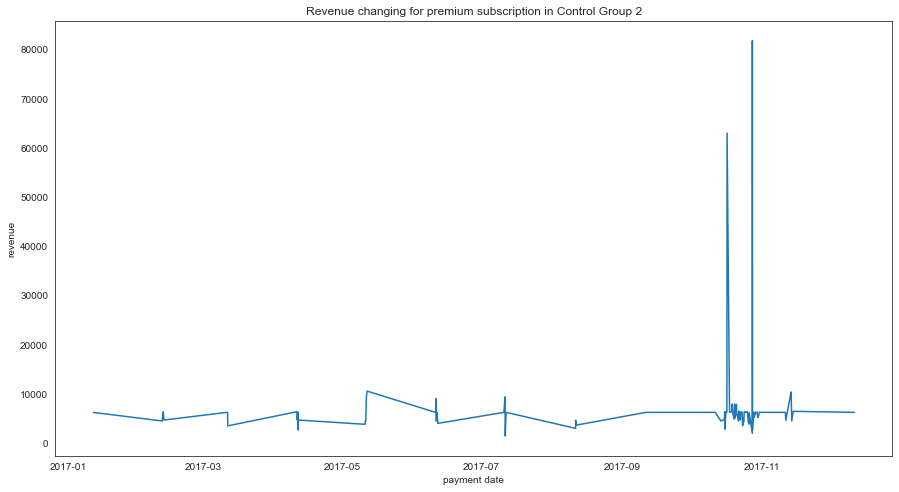

In [70]:
sns.set_style('white')

plt.figure(figsize=(15,8)) 
sns.lineplot(data = cg2_prem_p, x = 'payment_date', y = 'revenue', palette = 'OrRd')

plt.xlabel('payment date')
plt.ylabel('revenue')
plt.title('Revenue changing for premium subscription in Control Group 2')

In [71]:
# Объединение таблиц с данными для Тестовой группы

In [72]:
pay_tg.head()

,user_id,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
0,891345942,05.11.2017 13:00,13.11.2017 15:04,12909,147,TrialVipPopup,IT,trial
1,892054251,22.10.2017 0:33,30.10.2017 1:37,13923,147,TrialVipPopup,US,trial
2,892236423,18.10.2017 1:09,23.10.2017 0:15,3783,67,Menu,US,other
3,892236423,18.10.2017 1:09,27.10.2017 22:38,3783,67,Menu,US,other
4,892168170,19.10.2017 17:10,27.10.2017 19:10,9087,147,TrialVipPopup,US,trial


In [73]:
pay_tg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             273 non-null    int64 
 1   registration_date   273 non-null    object
 2   payment_date        273 non-null    object
 3   revenue             273 non-null    int64 
 4   payment_service_id  273 non-null    int64 
 5   place               273 non-null    object
 6   country             273 non-null    object
 7   product_type        273 non-null    object
dtypes: int64(3), object(5)
memory usage: 17.2+ KB


In [74]:
pay_tg.describe()

,user_id,revenue,payment_service_id
count,273.0,273.0,273.0
mean,"891,837,490.8","8,589.4",98.2
std,"377,745.2","11,127.5",57.8
min,"891,071,157.0",533.0,0.0
25%,"891,508,155.0","2,743.0",19.0
50%,"891,914,322.0","6,305.0",146.0
75%,"892,144,245.0","12,597.0",147.0
max,"892,438,635.0","113,477.0",147.0


In [75]:
pay_tg.groupby('product_type').agg({'revenue': 'sum'})

,revenue
product_type,
coins,566176
other,167817
prem,810706
trial,800202


In [76]:
prem_tg = pay_tg[pay_tg['product_type'] == 'prem']
prem_tg.groupby('user_id', as_index = False).agg({'revenue': 'sum'})

,user_id,revenue
0,891071157,9100
1,891152790,12597
2,891178380,113477
3,891222282,6292
4,891291531,4056
...,...,...
62,892370097,11115
63,892390170,5369
64,892405179,9100
65,892426491,12597


In [77]:
tg = pd.merge(por_tg, pay_tg, how = 'right', on = 'user_id')
tg

,user_id,age,attraction_distribution,coins,country_x,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,registration_date,payment_date,revenue,payment_service_id,place,country_y,product_type
0,891345942,52,209,nan,IT,"1,2,3,4,5,6,8,10",1,49,55,43,1.0,1.0,12909,05.11.2017 13:00,13.11.2017 15:04,12909,147,TrialVipPopup,IT,trial
1,892054251,37,390,nan,US,"1,2,3,4,6,7",1,34,40,64,1.0,1.0,13923,22.10.2017 0:33,30.10.2017 1:37,13923,147,TrialVipPopup,US,trial
2,892236423,23,262,378.0,US,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,1.0,1.0,95823,18.10.2017 1:09,23.10.2017 0:15,3783,67,Menu,US,other
3,892236423,23,262,378.0,US,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,1.0,1.0,95823,18.10.2017 1:09,27.10.2017 22:38,3783,67,Menu,US,other
4,892236423,23,262,378.0,US,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,1.0,1.0,95823,18.10.2017 1:09,22.10.2017 22:08,1261,19,EmptyLikes,US,coins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,891478452,38,421,nan,AE,"1,2,4,5,6,7,8,9,10,11",1,22,46,247,1.0,1.0,8697,02.11.2017 23:29,12.11.2017 0:11,8697,147,AutoReplyMessage,AE,prem
269,891414915,43,410,nan,AR,"1,2,3",1,40,46,56,1.0,1.0,6292,04.11.2017 9:06,04.11.2017 9:56,6292,147,AutoReplyMessage,AR,prem
270,891419625,33,487,nan,IL,"1,2,3,4,5,6,7,8,9,10",1,18,33,39,1.0,1.0,14352,04.11.2017 5:58,11.11.2017 8:33,14352,147,TrialVipPopup,IL,trial
271,891497073,51,122,nan,US,"1,2,3,4,5,6,7,8,9,10,11,13",1,48,54,557,1.0,0.0,2730,02.11.2017 15:33,05.11.2017 4:06,2730,67,EmptyLikes,US,other


In [78]:
tg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  273 non-null    int64  
 1   age                      273 non-null    int64  
 2   attraction_distribution  273 non-null    int64  
 3   coins                    150 non-null    float64
 4   country_x                273 non-null    object 
 5   retention_days           253 non-null    object 
 6   sex                      273 non-null    int64  
 7   user_dating.age_start    273 non-null    int64  
 8   user_dating.age_end      273 non-null    int64  
 9   view_count               273 non-null    int64  
 10  was_special              265 non-null    float64
 11  is_special               273 non-null    float64
 12  total_revenue            273 non-null    int64  
 13  registration_date        273 non-null    object 
 14  payment_date             2

In [79]:
tg.shape

(273, 20)

In [80]:
tg.describe()

,user_id,age,attraction_distribution,coins,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,revenue,payment_service_id
count,273.0,273.0,273.0,150.0,273.0,273.0,273.0,273.0,265.0,273.0,273.0,273.0,273.0
mean,"891,837,490.8",34.0,348.0,80.0,1.0,24.6,36.7,198.8,1.0,0.9,"24,545.1","8,589.4",98.2
std,"377,745.2",14.7,213.9,131.5,0.1,8.0,11.1,306.8,0.0,0.3,"26,179.0","11,127.5",57.8
min,"891,071,157.0",17.0,0.0,1.0,0.0,14.0,20.0,0.0,1.0,0.0,624.0,533.0,0.0
25%,"891,508,155.0",25.0,200.0,4.0,1.0,18.0,31.0,37.0,1.0,1.0,"10,101.0","2,743.0",19.0
50%,"891,914,322.0",32.0,319.0,16.0,1.0,23.0,36.0,109.0,1.0,1.0,"16,419.0","6,305.0",146.0
75%,"892,144,245.0",37.0,475.0,75.0,1.0,31.0,41.0,219.0,1.0,1.0,"27,404.0","12,597.0",147.0
max,"892,438,635.0",99.0,"1,000.0",530.0,1.0,50.0,99.0,"1,326.0",1.0,1.0,"129,870.0","113,477.0",147.0


In [81]:
# Распределение общего доходов по типу продукта для Тестовой группы

totrev_tg = tg.groupby('product_type', as_index = False).total_revenue.sum()
totrev_tg

,product_type,total_revenue
0,coins,2986477
1,other,1295697
2,prem,1433601
3,trial,985036


Text(0.5, 1.0, 'Total revenue for the product type in Test Group')

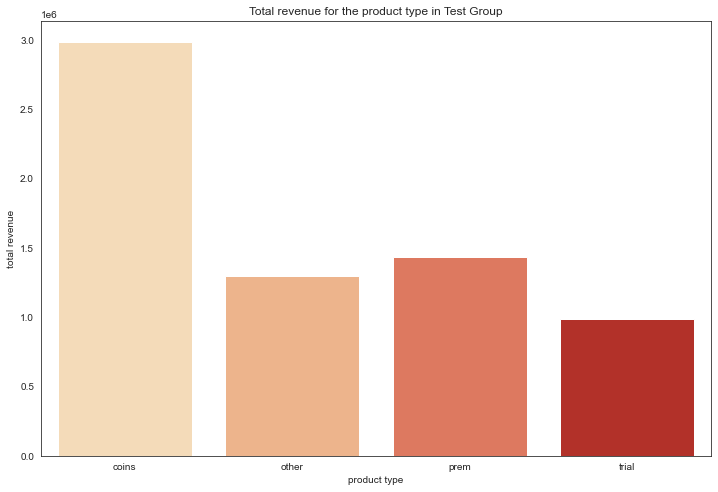

In [82]:
sns.set_style('white')

plt.figure(figsize=(12,8))
sns.barplot(x = 'product_type', y = 'total_revenue', data = totrev_tg, palette = 'OrRd')

plt.xlabel('product type')
plt.ylabel('total revenue')
plt.title('Total revenue for the product type in Test Group')

In [83]:
tg_prem = tg[tg['product_type'] == 'prem'] # пользователи Тестовой группы только с премиум подпиской
tg_prem.head()

,user_id,age,attraction_distribution,coins,country_x,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,registration_date,payment_date,revenue,payment_service_id,place,country_y,product_type
9,892236423,23,262,378.0,US,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,1.0,1.0,95823,18.10.2017 1:09,18.10.2017 1:15,6292,147,LeftMenu,US,prem
18,892426491,48,625,nan,US,"1,2,3",1,25,61,56,1.0,0.0,12597,14.10.2017 10:13,15.10.2017 22:39,12597,147,AutoReplyMessage,US,prem
19,891558921,38,470,6.0,US,"9,11",1,22,40,17,1.0,1.0,9997,01.11.2017 3:07,10.11.2017 9:05,9100,147,LeftMenu,US,prem
31,891861048,35,319,6.0,CA,"1,2,3,4,5,6,7,8,9,10,16",1,32,38,219,1.0,1.0,21359,26.10.2017 2:55,10.11.2017 19:00,3588,68,none,CA,prem
34,891861048,35,319,6.0,CA,"1,2,3,4,5,6,7,8,9,10,16",1,32,38,219,1.0,1.0,21359,26.10.2017 2:55,26.10.2017 3:00,3588,68,none,CA,prem


In [84]:
tg_prem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 9 to 269
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  76 non-null     int64  
 1   age                      76 non-null     int64  
 2   attraction_distribution  76 non-null     int64  
 3   coins                    30 non-null     float64
 4   country_x                76 non-null     object 
 5   retention_days           73 non-null     object 
 6   sex                      76 non-null     int64  
 7   user_dating.age_start    76 non-null     int64  
 8   user_dating.age_end      76 non-null     int64  
 9   view_count               76 non-null     int64  
 10  was_special              76 non-null     float64
 11  is_special               76 non-null     float64
 12  total_revenue            76 non-null     int64  
 13  registration_date        76 non-null     object 
 14  payment_date             76

In [85]:
tg_prem.shape

(76, 20)

In [86]:
tg_prem.describe()

,user_id,age,attraction_distribution,coins,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,revenue,payment_service_id
count,76.0,76.0,76.0,30.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0
mean,"891,859,854.0",34.1,357.2,57.9,1.0,22.6,37.8,137.5,1.0,0.9,"18,863.2","10,667.2",132.6
std,"383,793.6",15.8,208.3,113.8,0.0,7.2,14.3,182.5,0.0,0.3,"23,530.5","17,307.7",32.8
min,"891,071,157.0",17.0,0.0,1.0,1.0,14.0,20.0,0.0,1.0,0.0,"1,898.0","1,898.0",0.0
25%,"891,542,379.8",24.0,199.2,6.0,1.0,16.0,29.5,36.8,1.0,1.0,"7,770.8","6,012.5",147.0
50%,"891,864,535.5",32.5,319.0,16.0,1.0,20.5,37.0,86.5,1.0,1.0,"12,597.0","8,021.0",147.0
75%,"892,212,672.8",37.2,475.2,72.0,1.0,26.0,41.2,188.5,1.0,1.0,"18,668.0","10,052.2",147.0
max,"892,434,141.0",99.0,850.0,530.0,1.0,41.0,99.0,"1,326.0",1.0,1.0,"129,870.0","113,477.0",147.0


In [87]:
tg_prem['payment_date'] = pd.to_datetime(tg_prem['payment_date'])

<ipython-input-87-de247a1a5c03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_prem['payment_date'] = pd.to_datetime(tg_prem['payment_date'])


In [88]:
tg_prem_p = tg_prem.groupby(['payment_date'], as_index=False).agg({'revenue': 'sum'})

In [89]:
# Распределение дохода в течение периода от премиум подписок в Контрольной группе 1

Text(0.5, 1.0, 'Revenue changing for premium subscription in Test Group')

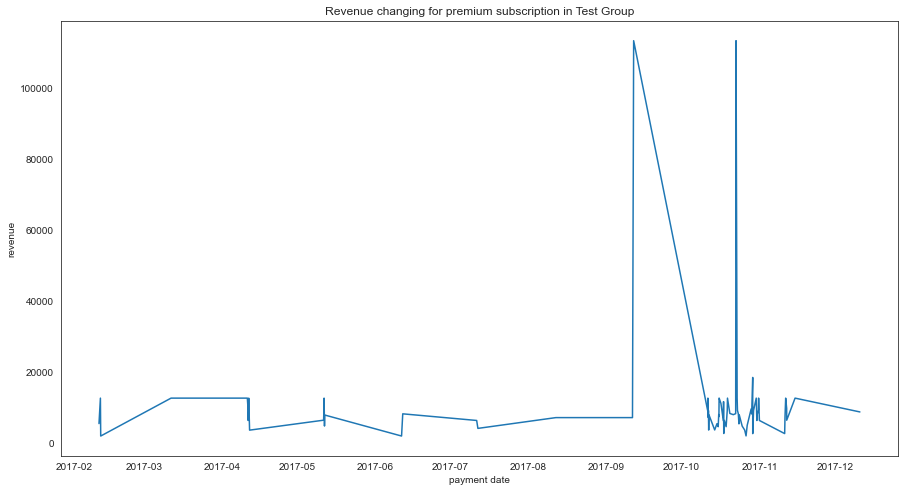

In [90]:
sns.set_style('white')

plt.figure(figsize=(15,8)) 
sns.lineplot(data = tg_prem_p, x = 'payment_date', y = 'revenue', palette = 'OrRd')

plt.xlabel('payment date')
plt.ylabel('revenue')
plt.title('Revenue changing for premium subscription in Test Group')

In [91]:
# Теперь давайте сравним распределение дохода по премиум-подпискам для каждой из групп

Text(0.5, 1.0, 'Revenue changing for premium subscription in Test Group')

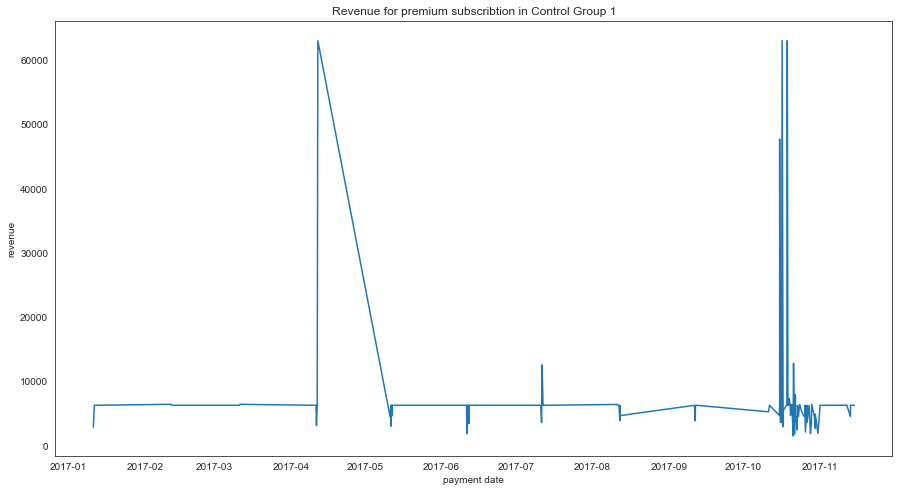

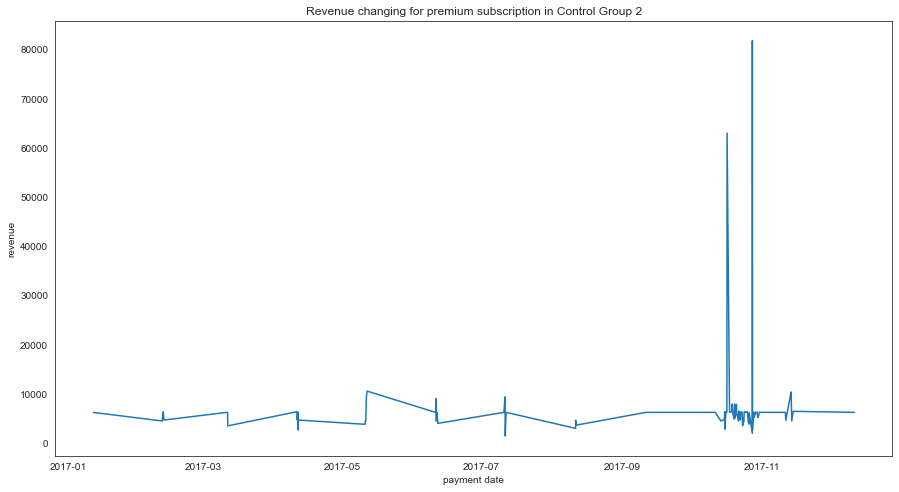

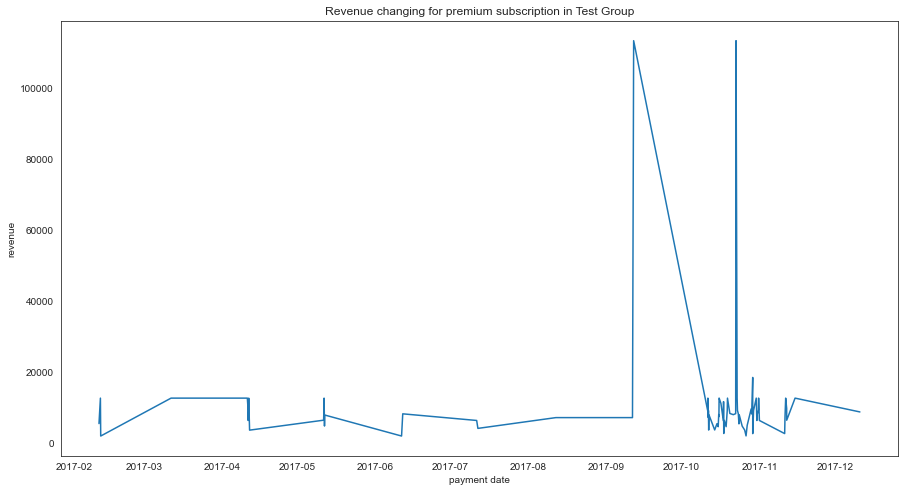

In [92]:
sns.set_style('white')

plt.figure(figsize=(15,8))
sns.lineplot(data = cg1_prem_p, x = 'payment_date', y = 'revenue', palette = 'OrRd')

plt.xlabel('payment date')
plt.ylabel('revenue')
plt.title('Revenue for premium subscribtion in Control Group 1')


plt.figure(figsize=(15,8)) 
sns.lineplot(data = cg2_prem_p, x = 'payment_date', y = 'revenue', palette = 'OrRd')

plt.xlabel('payment date')
plt.ylabel('revenue')
plt.title('Revenue changing for premium subscription in Control Group 2')


plt.figure(figsize=(15,8)) 
sns.lineplot(data = tg_prem_p, x = 'payment_date', y = 'revenue', palette = 'OrRd')

plt.xlabel('payment date')
plt.ylabel('revenue')
plt.title('Revenue changing for premium subscription in Test Group')

In [93]:
rev_cg1 = cg1.total_revenue.sum()    
rev_cg2 = cg2.total_revenue.sum()   
rev_tg = tg.total_revenue.sum() 

print('\n Распределение дохода по всем типам продукта по группам', '\n', '\n',
     'Контрольная группа 1:', rev_cg1, '\n',
     'Контрольная группа 2:', rev_cg2, '\n',
     'Тестовая группа:', rev_tg)


 Распределение дохода по всем типам продукта по группам 
 
 Контрольная группа 1: 18708053.0 
 Контрольная группа 2: 4266262 
 Тестовая группа: 6700811


In [94]:
rev_prem_cg1 = cg1_prem.total_revenue.sum()   
rev_prem_cg2 = cg2_prem.total_revenue.sum()    
rev_prem_tg = tg_prem.total_revenue.sum()
print('\n Распределение дохода по типу продукта: премиум-подписки по группам', '\n', '\n',
     'Контрольная группа 1:', rev_prem_cg1, '\n',
     'Контрольная группа 2:', rev_prem_cg2, '\n',
     'Тестовая группа:', rev_prem_tg)


 Распределение дохода по типу продукта: премиум-подписки по группам 
 
 Контрольная группа 1: 1700257.0 
 Контрольная группа 2: 1128205 
 Тестовая группа: 1433601


In [95]:
# РЕЗУЛЬТАТЫ АНАЛИЗА УСПЕШНОСТИ НОВОЙ ПОЛИТИКИ ЦЕН

# Результат анализа дохода от каждого продукта: самый высокий у Контрольной группы 1, 
# на втором месте по уровню общего дохода находится
# Тестовая группа, и самый низкий показатель у Контрольной группы 2.

# Результат анализа дохода только от премиум-подписки: самый высокий показатель у Контрольной группы 1,
# и состовялет 1700257; самый низкий показатель дохода у Контрольной группы 2, который составляет
# 1128205; доход от премиум-подпсики в Тестовой группы имеет средние показатели и составляет 143360.

# Для анализа графика необходимо иметь информацию о датах введения новой политики цен на премиум-подписку
# в приложении. Однако, можно предположить, что какие-то изменения были проведены в октябре-ноябре, так как
# у всех групп в этот период наблюдается высокий скачок по показателю доходов.

# Таким образом, успешность эксперемента становится под вопрос, так как показатели дохода в Тестовой группе,
# на которой и проводился тест по новой политики цен на премиум подписки, показывает довольно средние
# результаты в сравнении с Контрольной группой 1 и Контрольной группой 1.

In [96]:
# Имеет ли данная правка смысл хоть на каких-то группах пользователей?

In [98]:
tg_prem.head()

,user_id,age,attraction_distribution,coins,country_x,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,registration_date,payment_date,revenue,payment_service_id,place,country_y,product_type
9,892236423,23,262,378.0,US,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,1.0,1.0,95823,18.10.2017 1:09,2017-10-18 01:15:00,6292,147,LeftMenu,US,prem
18,892426491,48,625,nan,US,"1,2,3",1,25,61,56,1.0,0.0,12597,14.10.2017 10:13,2017-10-15 22:39:00,12597,147,AutoReplyMessage,US,prem
19,891558921,38,470,6.0,US,"9,11",1,22,40,17,1.0,1.0,9997,01.11.2017 3:07,2017-10-11 09:05:00,9100,147,LeftMenu,US,prem
31,891861048,35,319,6.0,CA,"1,2,3,4,5,6,7,8,9,10,16",1,32,38,219,1.0,1.0,21359,26.10.2017 2:55,2017-10-11 19:00:00,3588,68,none,CA,prem
34,891861048,35,319,6.0,CA,"1,2,3,4,5,6,7,8,9,10,16",1,32,38,219,1.0,1.0,21359,26.10.2017 2:55,2017-10-26 03:00:00,3588,68,none,CA,prem


<AxesSubplot:title={'center':'Control Group 2'}, xlabel='total_revenue', ylabel='age'>

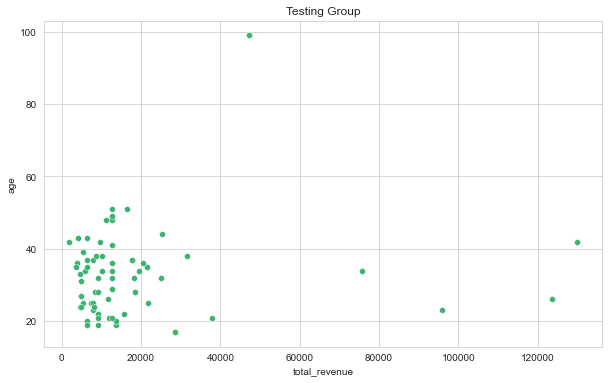

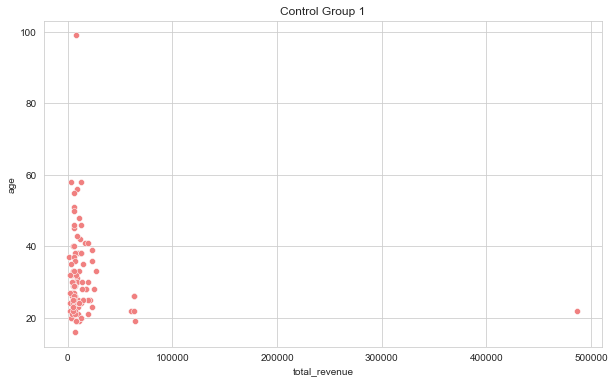

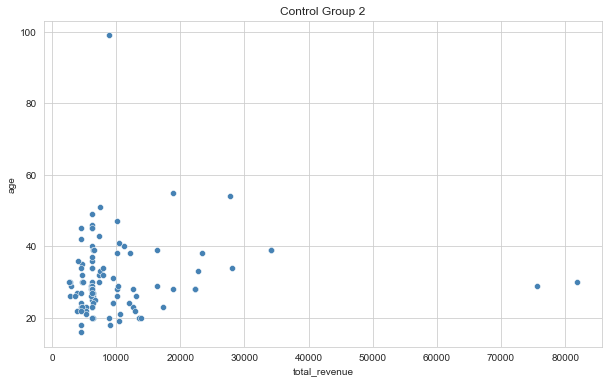

In [125]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
plt.title('Testing Group')
sns.scatterplot(data = tg_prem, x = 'total_revenue', y = 'age', color = 'mediumseagreen')

plt.figure(figsize=(10,6))
plt.title('Control Group 1')
sns.scatterplot(data = cg1_prem, x = 'total_revenue', y = 'age', color = 'lightcoral')

plt.figure(figsize=(10,6))
plt.title('Control Group 2')
sns.scatterplot(data = cg2_prem, x = 'total_revenue', y = 'age', color = 'steelblue')

<AxesSubplot:title={'center':'Control Group 2'}, xlabel='country_x', ylabel='total_revenue'>

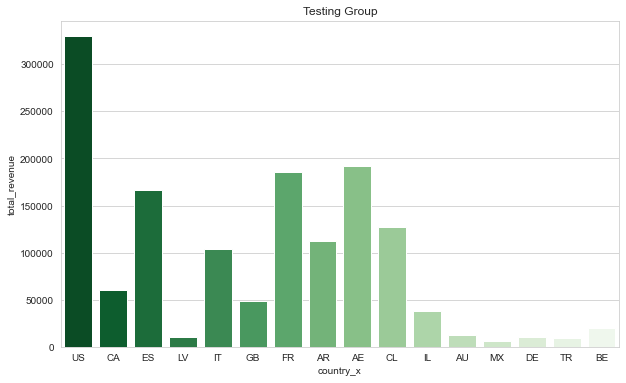

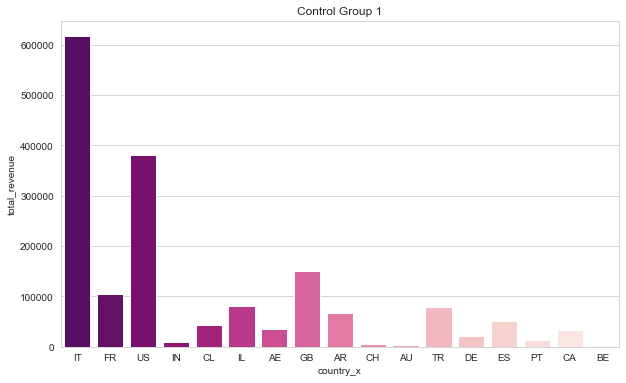

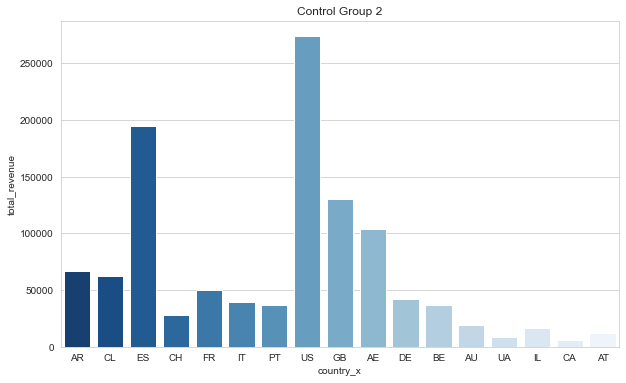

In [137]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
plt.title('Testing Group')
sns.barplot(y = 'total_revenue', x = 'country_x', data = tg_prem, estimator = sum, ci=None, palette="Greens_r")

plt.figure(figsize=(10,6))
plt.title('Control Group 1')
sns.barplot(y = 'total_revenue', x = 'country_x', data = cg1_prem, estimator = sum, ci=None, palette="RdPu_r")

plt.figure(figsize=(10,6))
plt.title('Control Group 2')
sns.barplot(y = 'total_revenue', x = 'country_x', data = cg2_prem, estimator = sum, ci=None, palette="Blues_r")

In [155]:
tg_prem.sex.value_counts()

1    76
Name: sex, dtype: int64

In [156]:
cg1_prem.sex.value_counts()

1.0    106
Name: sex, dtype: int64

In [157]:
cg2_prem.sex.value_counts()

1    102
0      5
Name: sex, dtype: int64

In [ ]:
# Пол как категория пользователей откланяется по причине сильного меньшинства одной сторон (sex = 0), и
# преобладание по количеству другой (sex = 1)

In [ ]:
# Ответ на вопрос: Имеет ли данная правка смысл хоть на каких-то группах пользователей?

# Проанализировав три фактора, благодаря которым можно выделить несколько групп пользователей, для которых
# правка по цене на премиум-подписку имеет смысл, можно выделить две категорий:
# - пользователи возрастной категории 20-40 лет;
# - пользователи из United States of America;